In [1]:
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt

df_bal = pd.read_csv("../../corpus_sprint2_balanced_cp.csv", encoding="utf-8")
df = df_bal["Consumer complaint narrative"]
df = df.dropna()

model = Doc2Vec.load("../../model_doc2vec_balanced_20epochs")

In [2]:
vectors = model.docvecs.doctag_syn0

[[-0.02092724 -0.1787254  -0.02488375 ... -0.12681942  0.11478117
   0.1283714 ]
 [-0.2789287  -0.06197561  0.26315284 ...  0.05139109  0.15418749
  -0.1269095 ]
 [-0.23172821  0.01604747  0.38824126 ...  0.00333929  0.0273787
  -0.24061987]
 ...
 [ 0.13044342 -0.1385314   0.2794611  ...  0.16683841  0.02816469
   0.08737946]
 [-0.43434408 -0.09784658  0.31782246 ... -0.01924675  0.320871
  -0.04654588]
 [-0.15576039 -0.20247552  0.03559433 ... -0.03181177  0.16479182
   0.05527947]]


C:\Users\strum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics

4
5
6
7
8
9
10
11
12
13
14


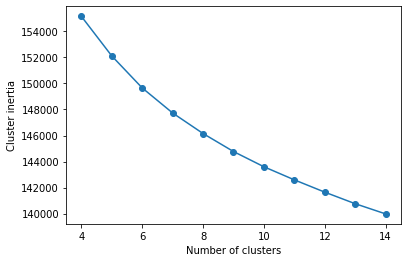

'kmeans = KMeans(n_clusters=max_k)\nkmeans.fit(vectors) \n\nlabels = kmeans.labels_\ncentroids = kmeans.cluster_centers_\nprint ("Cluster id labels for inputted data")\nprint (labels)\nprint ("Centroids data")\nprint (centroids)\n \nprint ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")\nprint (kmeans.score(vectors))\n \nsilhouette_score = metrics.silhouette_score(vectors, labels, metric=\'euclidean\')\n \nprint ("Silhouette_score: ")\nprint (silhouette_score)'

In [6]:
inertia = []
k_min=4
k_max=15
for i in range(k_min, k_max):
    print(i)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(vectors)
    
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_)

plt.plot(range(k_min,k_max), inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia')
plt.show()

"""kmeans = KMeans(n_clusters=max_k)
kmeans.fit(vectors) 

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(vectors))
 
silhouette_score = metrics.silhouette_score(vectors, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)"""

In [ ]:
## Assign the labels
df["clust"] = labels
df_clustered = pd.concat([df, pd.DataFrame(labels, columns=["clust"])], axis = 1)

In [ ]:
print(df)
# Check count of news articles in each cluster
#sums = df_clustered.groupby("clust")["clust"].count()
#print(sums)

#plot = df.plot.pie(y="Consumer complaint narrative", figsize=(10, 10))


#df_clustered.groupby("clust")["clust"].count().plot(kind = "pie", autopct='%.2f', figsize = (10, 10))